In [2]:
from src.functions import *

**Problema 5**: A constante de Stefan-Boltzman, $\sigma$, relaciona a energia total emitida por um corpo negro com a sua temperatura. Ela é dada por

$$
\sigma=\frac{\pi^2k_b^4}{60\hbar^3c^2}\zeta(4),
$$
onde $\zeta(s)$ é função zeta de Riemann. A função zeta de Riemann pode ser expressa na forma na forma integral:
$$
\zeta(s)=\frac{1}{\Gamma(s)}\int_0^{\infty}\frac{x^{s-1}e^{-x}}{1-e^{-x}}dx,
$$
onde $\Gamma(s)=(s-1)!$ é a função Gamma. Utilizando *importance sampling*, gere amostras aleatórias de $x$ de uma distribuição exponencial, $\omega(x)=e^{-x}$ para $x\ge0$, que corresponde ao termo $e^{-x}$ no integrando. Reescreva a integral como
$$
\zeta(s)=\frac{1}{\Gamma(s)}\mathbb{E}\left[\frac{x^{s-1}}{1-e^{-x}}dx\right].
$$
Compare seu resultado de Monte Carlo com o valor exato:
$$
\zeta(4)=\frac{\pi^4}{90}.
$$

In [7]:
# Distribuição de Boltzmann (não-normalizada)
def P(x):
    return (2*np.pi/3)+(np.cos(x))**2

# Distribuição proposta (uniforme) no intervalo [-a, a]
#a = 1
#a = 3
# def g(a, x):
#     return 1 / (2 * a) if -a <= x <= a else 0
def g(x):
    return 1 / (2)

def P_teorica(x):
    return (2*np.pi/3)+(np.cos(x))**2

# Rejection Sampling

def rejection_sampling(n_samples, M):
    """
    Função irá filtrar um número n_samples desejados, dentro do intervalo [-a, a], seguindo o critério proposto no rejection_samples, onde:
    x_proposto é aceito, se, um número u gerado de forma uniforme for tal que u <= P(x_proposto)/(M * g(x_proposto)), com M sendo uma constante
    de tal forma que Mg(x) > P(x), para que a função g(x) englobe a distribuição de interesse.
    
    args:
        n_samples (int): número de amostras desejados
        a (int): intervalo simétrico de intereresse
    """
    
    
    samples = []
    
    # Valor de M que faz com que Mg(x) >= P(x) para todos x no intervalo de interesse [-a, a]
    #M = max([P(y) / g(a, y) for y in np.linspace(-a, a, 1000) if g(a, y) != 0])
    
    while len(samples) < n_samples:
        # Amostra da proposta
        x_prop = random.uniform(0, np.pi)
        u = random.uniform(0, 1)
        
        # Verificar aceitação
        if u <= P(x_prop) / (M * g(x_prop)) and g(x_prop) != 0:
            samples.append(x_prop)
    
    return samples

# Função para calcular a distribuição (Pk) e os valores de k
def distribution_data(samples, m):
    # Construir os bins e calcular as distribuições
    """
    Calcula a distribuição normalizada a partir dos dados propostos

    args:
        samples (list): valores aceitos pelo método de rejection_samples.
        a (float): valor utilizado no intervalo simétrico que iremos analisar [-a, a].
        m (int): número de pontos utilizados na discretização no eixo x.
    
    """
    #m = 100 # Número de pontos utilizados na discretização do eixo x
    x = np.linspace(0, np.pi, m) 
    bins = [(float(x[i]), float(x[i+1])) for i in range(m-1)]
    count_values = [0 for i in range(m - 1)]

    # Contando valores de samples dentro dos intervalos de bins
    for sample in samples:
        for i, (start, end) in enumerate(bins):
            if start <= sample < end:  # Verifica se a amostra está no intervalo
                count_values[i] += 1   # Se o valor estiver dentro do intervalo, atualiza a contagem
                break  # Sai do loop assim que o intervalo correto for encontrado

    # Calculando largura dos bins (assumimos largura constante)
    bin_width = bins[0][1] - bins[0][0]

    # Como possuímos bins igualmente espaçados (step), devemos normalizar considerando a largura dos bins
    total_count = sum(count_values)
    Pk_data = [(count / (total_count * bin_width)) for count in count_values]  # Densidade
    k_data = [(bin[1] + bin[0]) / 2 for bin in bins]  # Centros dos bins

    # Filtrando para remover zeros
    filtered_k_data = [k for k, pk in zip(k_data, Pk_data) if pk > 0]
    filtered_Pk_data = [pk for pk in Pk_data if pk > 0]

    return filtered_k_data, filtered_Pk_data


In [8]:
# Item (a) <---------------
# Determina largura da gaussiana
def P(x):
    return ((2/(3*np.pi))*(1+x**2))/np.sqrt(1-x**2)
    #return ((2/(3*np.pi))*(1+(np.cos(x))**2))/np.sin(x)
    #return (1+(np.cos(x))**2)
    #x=np.cos(x)
    #return (1+x**2)
n_samples = 10**5
M = 50
#a=0
#b=np.pi
a=-1
b=1

# Retorna lista de valores aceitos
#def rejection_sampling(n_samples, a, b, M, P, g):
#samples = rejection_sampling(n_samples, M)
samples = rejection_sampling(n_samples, a, b, M, P, g)

print('Amostras aceitas para distribuição de Boltzmann (Rejection samples)')
#print(samples)

Amostras aceitas para distribuição de Boltzmann (Rejection samples)


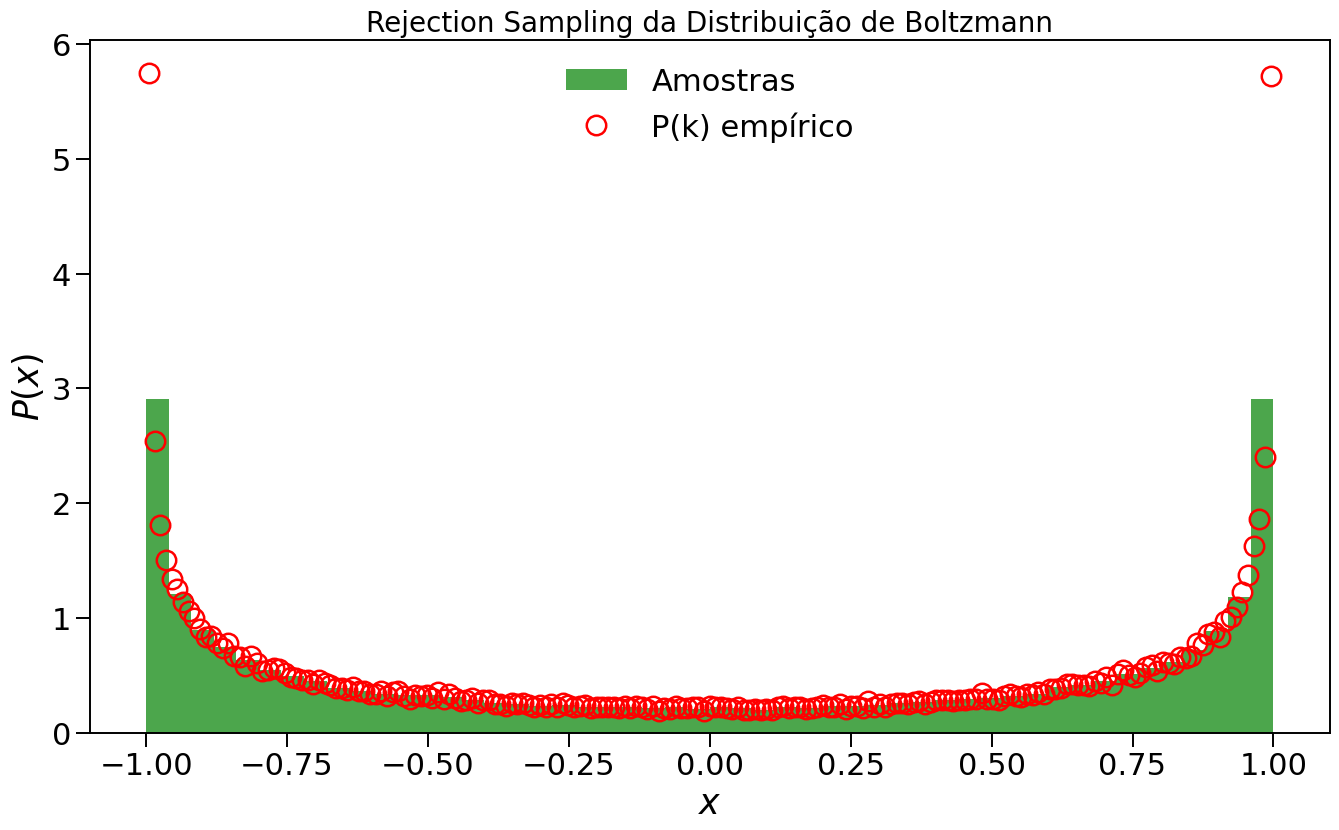

In [9]:
# Item (b) - Plot do Histograma <---------------
m = 200 # número de bins na distribuição
# x_aceito e p(x_aceito) empíricos
k_data, Pk_data = distribution_data(samples, a, b, m)
fig = plt.subplots(figsize=(16, 9))
plt.hist(samples, bins=50, density=True, alpha=0.7, label="Amostras", color='green')
plt.plot(k_data, Pk_data, 'o', label='P(k) empírico', mfc = "None", mec = "red", ms=14, mew=1.8)
#plt.plot(x, P(x) / sum(P(x)), label="Distribuição alvo (não normalizada)", color='red')
#plt.plot(samples, P(samples) / sum(P(samples)), label="Distribuição alvo (não normalizada)", color='red')
plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.xlabel(r"$x$", size=25)
plt.ylabel(r"$P(x)$", size=25)
plt.title("Rejection Sampling da Distribuição de Boltzmann", size=20)
plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.show()

In [14]:
E = np.mean(samples) # Valor esperado das amostras (média)
var = np.var(samples) # Variância das amostras

E_teo = np.pi/2 # Valor esperado teórico
var_teo = (2/(3*np.pi))*(((np.pi)**3)/3+(np.pi**3)/6)-(np.pi/2)**2 # Variância teórica

Err_E = abs(E - E_teo)
Err_var = abs(var - var_teo)

print(f'E_medido = {E}, E_teórico = {E_teo}, Erro_Absoluto = {Err_E}')
print(f'var_medido = {var}, var_teórico = {var_teo}, Erro_Absoluto = {Err_var}')

E_medido = 1.570234304085609, E_teórico = 1.5707963267948966, Erro_Absoluto = 0.000562022709287513
var_medido = 0.9185535723992078, var_teórico = 0.8224670334241133, Erro_Absoluto = 0.09608653897509445


In [22]:
def direct_zeta(N, s):
    S = 0  # Inicializa a soma
    for i in range(1, N+1):
        x_i = np.random.uniform(0, 1)  # Gera um número aleatório uniforme entre 0 e 1
        x_i = -np.log(x_i) #importance sampling
        S += (1/6)*(x_i ** (s-1))/(1-np.exp(-x_i))  # Atualiza a soma de zetta (soma acumulada)
    
    return S / N  # Retorna a média ponderada Σ/N

In [20]:
# Exemplo de uso da função
N = 1000000  # Número de iterações
s = 4  # Valor de s
resultado = direct_zeta(N, s)
resultado

1.085085050077421

Diferença do valor exato

In [19]:
Delta_zetta=np.pi**4/90-resultado
Delta_zetta

-0.0005588292088194446

**Problema 4:** Considere a integral de uma fução...

### **Item (a)**

In [ ]:
def integral_I(N,d):
    S = 0  # Inicializa a soma
    for i in range(1,N+1):
        for j in range(0,d):
            x_i[j]=np.random.uniform(0,1) # Gera um número aleatório uniforme entre 0 e 1
            S+=np.exp(-abs(x_i[j]))**2    # Atualiza a soma de zetta (soma acumulada)

    return S/N


In [30]:

def integral_I(N, d):
    """
    Aproximação de uma integral pelo método de Monte Carlo, calculando manualmente o módulo 
    (norma euclidiana) e mantendo um laço explícito sobre N.

    Args:
        N (int): Número de amostras aleatórias.
        d (int): Dimensão da integral.

    Returns:
        float: Valor aproximado da integral.
    """
    S = 0  # Inicializa a soma
    
    for i in range(N):  # Laço sobre as N amostras
        # Gera um vetor aleatório de tamanho d, com valores uniformes entre 0 e 1
        x_i = np.random.uniform(0, 1, d)
        
        # Calcula o módulo (norma euclidiana) do vetor x_i manualmente
        # Fórmula: ||x|| = sqrt(x_1^2 + x_2^2 + ... + x_d^2)
        modulus = np.sqrt(np.sum(x_i**2))
        
        # Soma a função objetivo avaliada no módulo
        S += np.exp(-modulus**2)

    # Retorna a média acumulada da soma para aproximar o valor da integral
    return S / N



In [37]:
N = 100000  # Número de amostras
d = 10      # Dimensão

resultado = integral_I(N, d)
print(f"Valor aproximado da integral: {resultado}")


Valor aproximado da integral: 0.05396402347745046


<>:6: SyntaxWarning: invalid escape sequence '\i'
<>:6: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Germano\AppData\Local\Temp\ipykernel_2040\2320719654.py:6: SyntaxWarning: invalid escape sequence '\i'
  """


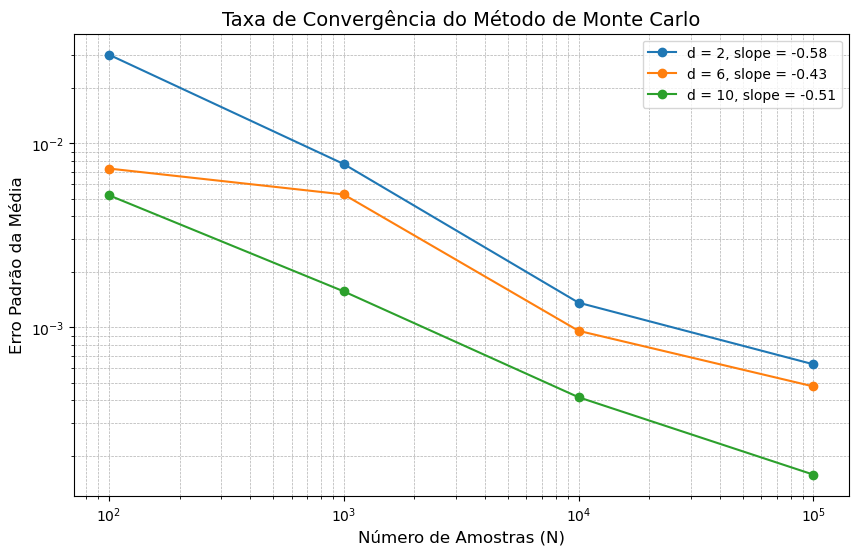

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular a integral aproximada usando Monte Carlo
def monte_carlo_integral(N, d):
    """
    Calcula a integral \int_{[0,1]^d} e^{-|x|^2} dx por Monte Carlo.
    
    Args:
        N (int): Número de amostras.
        d (int): Dimensão da integral.
    
    Returns:
        float: Valor aproximado da integral.
    """
    samples = np.random.uniform(0, 1, size=(N, d))  # Amostras no cubo [0, 1]^d
    moduli_squared = np.sum(samples**2, axis=1)     # Calcula |x|^2
    integral = np.mean(np.exp(-moduli_squared))     # Média das avaliações da função
    return integral

# Função para calcular erro padrão da média e a taxa de convergência
def convergence_rate(d, N_samples_list):
    """
    Calcula o erro padrão da média e taxa de convergência para diferentes números de amostras.
    
    Args:
        d (int): Dimensão da integral.
        N_samples_list (list of int): Lista com o número de amostras.
    
    Returns:
        tuple: Lista de erros padrão da média e taxas de convergência.
    """
    errors = []
    for N in N_samples_list:
        estimates = [monte_carlo_integral(N, d) for _ in range(10)]  # Média em 10 execuções
        error_std = np.std(estimates)                                # Erro padrão
        errors.append(error_std)
    
    # Calcula a taxa de convergência: log-log slope
    log_N = np.log(N_samples_list)
    log_errors = np.log(errors)
    slope = np.polyfit(log_N, log_errors, 1)[0]  # Coeficiente angular da reta
    return errors, slope

# Parâmetros
dimensions = [2, 6, 10]
N_samples_list = [10**i for i in range(2, 6)]  # Amostras variando de 10^2 a 10^5

# Plotagem
plt.figure(figsize=(10, 6))
for d in dimensions:
    errors, slope = convergence_rate(d, N_samples_list)
    plt.plot(N_samples_list, errors, label=f'd = {d}, slope = {slope:.2f}', marker='o')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Número de Amostras (N)', fontsize=12)
plt.ylabel('Erro Padrão da Média', fontsize=12)
plt.title('Taxa de Convergência do Método de Monte Carlo', fontsize=14)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [3]:
# Item (a) <---------------
# Determina largura da gaussiana
a = 10
n_samples = 10**6
M = 50
# Retorna lista de valores aceitos
#samples = rejection_sampling(n_samples, a)
samples = rejection_sampling(n_samples, a, M)
print('Amostras aceitas para distribuição de Boltzmann (Rejection samples)')
#print(samples)

Amostras aceitas para distribuição de Boltzmann (Rejection samples)


### **Item (b)**

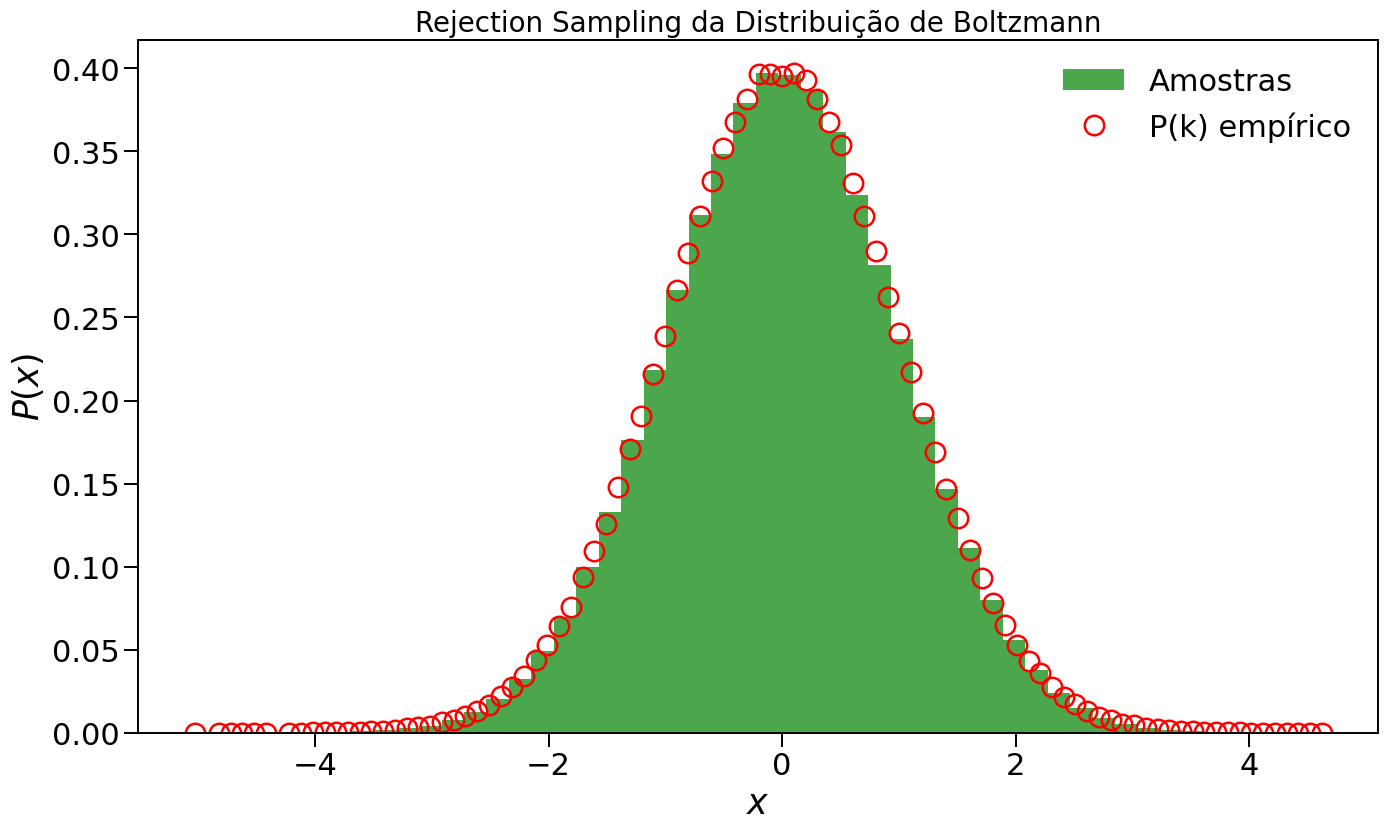

In [4]:
# Item (b) - Plot do Histograma <---------------
m = 200 # número de bins na distribuição
# x_aceito e p(x_aceito) empíricos
k_data, Pk_data = distribution_data(samples, a, m)
fig = plt.subplots(figsize=(16, 9))
plt.hist(samples, bins=50, density=True, alpha=0.7, label="Amostras", color='green')
plt.plot(k_data, Pk_data, 'o', label='P(k) empírico', mfc = "None", mec = "red", ms=14, mew=1.8)
#plt.plot(x, P(x) / sum(P(x)), label="Distribuição alvo (não normalizada)", color='red')
#plt.plot(samples, P(samples) / sum(P(samples)), label="Distribuição alvo (não normalizada)", color='red')
plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.xlabel(r"$x$", size=25)
plt.ylabel(r"$P(x)$", size=25)
plt.title("Rejection Sampling da Distribuição de Boltzmann", size=20)
plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.show()

### **Item (c)**

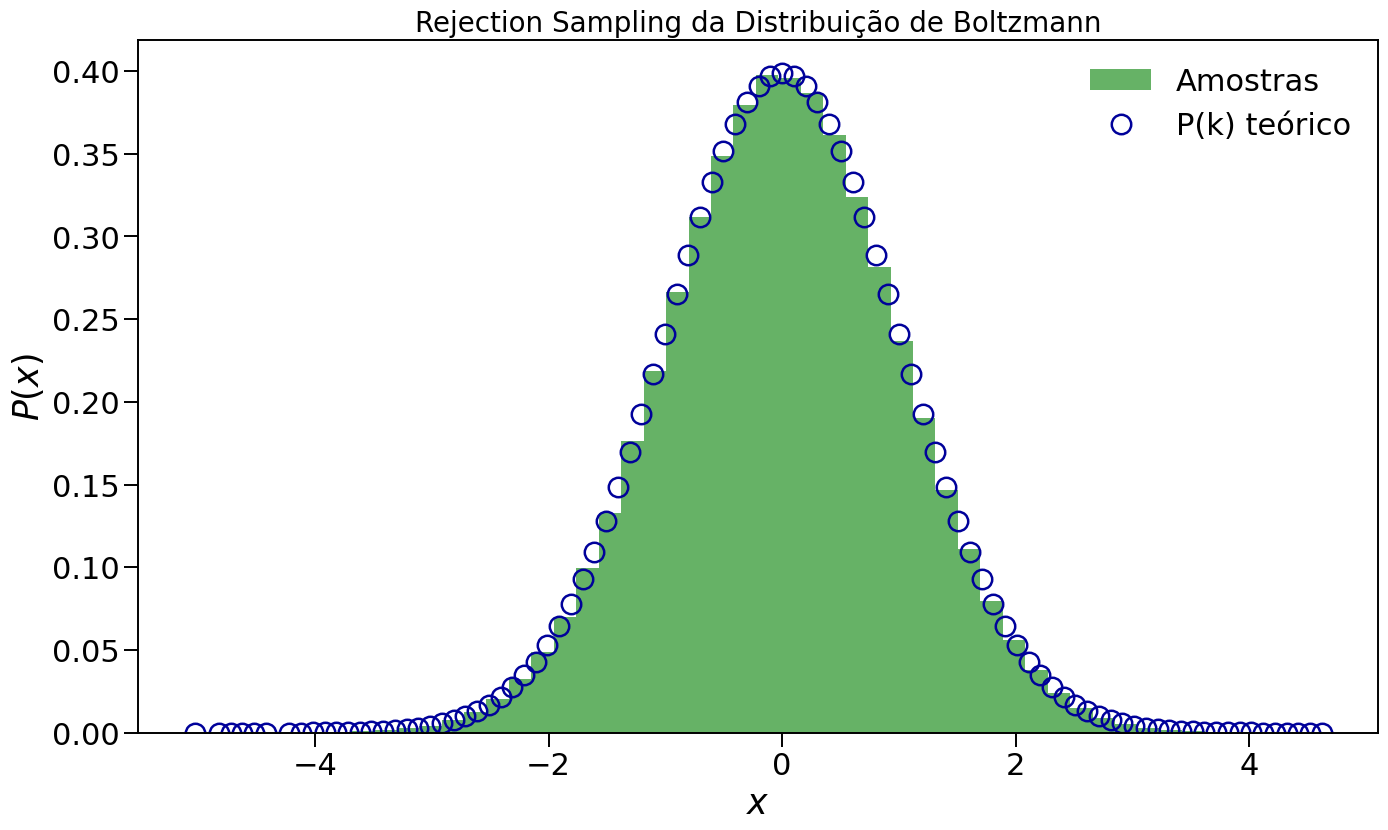

In [9]:
Pk_teo = [P_teorica(i) for i in k_data]
# Visualizar os resultados
m = 50 # número de bins na distribuição
fig = plt.subplots(figsize=(16, 9))
plt.hist(samples, bins=50, density=True, alpha=0.6, label="Amostras", color='green')
plt.plot(k_data, Pk_teo, 'o', label='P(k) teórico', mfc = "None", mec = "#00019a", ms=14, mew=1.8)
#plt.plot(x, P(x) / sum(P(x)), label="Distribuição alvo (não normalizada)", color='red')
#plt.plot(samples, P(samples) / sum(P(samples)), label="Distribuição alvo (não normalizada)", color='red')
plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.xlabel(r"$x$", size=25)
plt.ylabel(r"$P(x)$", size=25)
plt.title("Rejection Sampling da Distribuição de Boltzmann", size=20)
plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.show()

### **Item (d)**

In [6]:
E = np.mean(samples) # Valor esperado das amostras (média)
var = np.var(samples) # Variância das amostras

E_teo = 0.0 # Valor esperado teórico
var_teo = 1 / beta * k # Variância teórica

Err_E = abs(E - E_teo)
Err_var = abs(var - var_teo)

print(f'E_medido = {E}, E_teórico = {E_teo}, Erro_Absoluto = {Err_E}')
print(f'var_medido = {var}, var_teórico = {var_teo}, Erro_Absoluto = {Err_var}')

E_medido = 0.000895434701422692, E_teórico = 0.0, Erro_Absoluto = 0.000895434701422692
var_medido = 0.9997021949694822, var_teórico = 1.0, Erro_Absoluto = 0.00029780503051779483


### **Item(e)**

In [7]:
from scipy.stats import ks_2samp, chi2_contingency

ks_stat, ks_p_value = ks_2samp(Pk_teo, Pk_data)

bins = np.linspace(min(min(Pk_teo), min(Pk_data)), max(max(Pk_teo), max(Pk_data)), 10)
hist_teo, _ = np.histogram(Pk_teo, bins=bins)
hist_data, _ = np.histogram(Pk_data, bins=bins)

# Remover categorias onde ambos os histogramas são zero
valid_indices = (hist_teo > 0) | (hist_data > 0)
hist_teo = hist_teo[valid_indices]
hist_data = hist_data[valid_indices]

# Nova tabela de contingência
contingency_table = np.array([hist_teo, hist_data])

# Aplicar o teste qui-quadrado
chi2_stat, chi2_p_value, _, _ = chi2_contingency(contingency_table)

# Interpretação dos resultados
alpha = 0.05  # Nível de significância

# Teste KS
if ks_p_value < alpha:
    print("KS Test: Rejeitamos H0. As distribuições são diferentes.")
else:
    print("KS Test: Não rejeitamos H0. As distribuições podem ser iguais.")

# Teste Qui-Quadrado
if chi2_p_value < alpha:
    print("Qui-Quadrado: Rejeitamos H0. As distribuições são diferentes.")
else:
    print("Qui-Quadrado: Não rejeitamos H0. As distribuições podem ser iguais.")

KS Test: Não rejeitamos H0. As distribuições podem ser iguais.
Qui-Quadrado: Não rejeitamos H0. As distribuições podem ser iguais.


### **Item (f)**

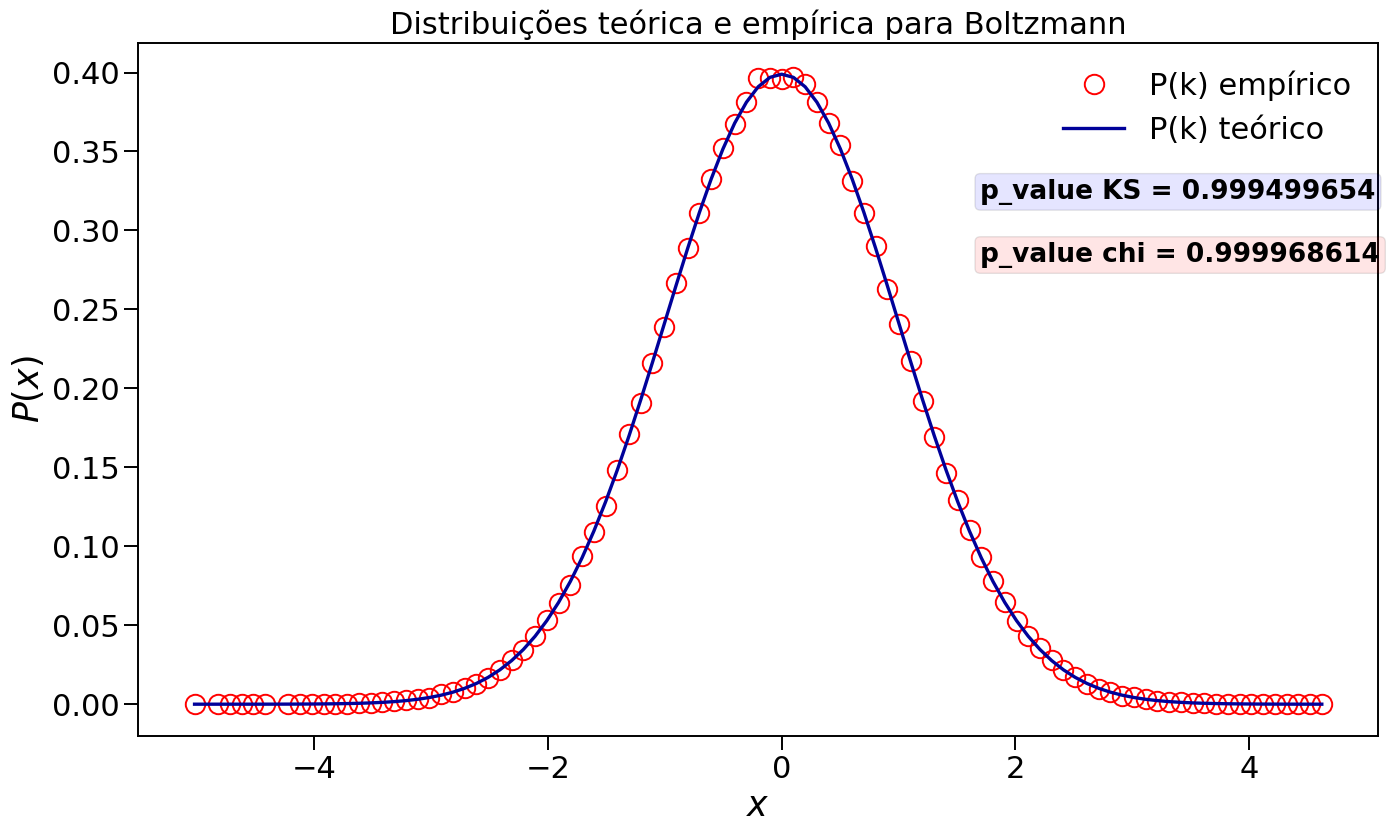

In [8]:
# Item (c) - Plot do Histograma <---------------
Pk_teo = [P_teorica(i) for i in k_data]
# Visualizar os resultados
#x = np.linspace(-a, a, 1000)
fig = plt.subplots(figsize=(16, 9))
plt.plot(k_data, Pk_data, 'o', label='P(k) empírico', mfc = "None", mec = "red", ms=14, mew=1.4)
plt.plot(k_data, Pk_teo, label='P(k) teórico', mfc = "None", color = "#00019a", linewidth=2.4)
#plt.plot(x, P(x) / sum(P(x)), label="Distribuição alvo (não normalizada)", color='red')
#plt.plot(samples, P(samples) / sum(P(samples)), label="Distribuição alvo (não normalizada)", color='red')

plt.text(x=1.7, y=.32, s=rf"p_value KS = {ks_p_value:.9f}", fontsize=19, fontweight="bold", 
        color="black",bbox=dict(facecolor='blue', edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))
plt.text(x=1.7, y=.28, s=rf"p_value chi = {chi2_p_value:.9f}", fontsize=19, fontweight="bold", 
        color="black",bbox=dict(facecolor='red', edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))

plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.xlabel(r"$x$", size=25)
plt.ylabel(r"$P(x)$", size=25)
plt.title("Distribuições teórica e empírica para Boltzmann", size=22)
plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.show()